# **Airline Delay Dataset**

The below analyzes the delay data for airlines as is supplied by the Bureau of Transportation Statistics (BoTS). The below links can direct you to the data:
- [Overview of Delay Data](https://www.transtats.bts.gov/TableInfo.asp?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr&V0s1_b0yB=D)
- [Download Link for Delay Data](https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr)
- [Data Dictionary](https://www.bts.gov/topics/airlines-and-airports/number-14-time-reporting)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re

DATA_PATH = Path() / "data"

## Import data, format

In [2]:
selected_cols = [
    # flight identifiers / general data
    "FlightDate", "Tail_Number", 
    # "Flight_Number_Reporting_Airline",
    # "Flights", 
    "Distance", # "DistanceGroup",
    "FirstDepTime", # "TotalAddGTime", "LongestAddGTime",
    # departure, arrival time
    "CRSDepTime", # "DepTime", "DepTimeBlk",
    "CRSArrTime", # "ArrTime", "ArrTimeBlk",
    "ActualElapsedTime", # "AirTime", "CRSElapsedTime",
    # airline identifiers
    "Reporting_Airline", # "DOT_ID_Reporting_Airline", "IATA_CODE_Reporting_Airline",
    # origin
    "OriginAirportID", "OriginCityName", # "OriginAirportSeqID", "OriginCityMarketID", "Origin", "OriginCityName", "OriginState", "OriginStateFips", "OriginStateName", "OriginWac",
    # destination
    "DestAirportID", "DestCityName", # "DestAirportSeqID", "DestCityMarketID", "Dest", "DestCityName", "DestState", "DestStateFips", "DestStateName", "DestWac",
    # delay data
    "DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups",
    "ArrDelay","ArrDelayMinutes","ArrDel15", "ArrivalDelayGroups",
    "CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay",
    # time spent data
    # "TaxiOut", "WheelsOff", "WheelsOn", "TaxiIn",
    # cancellation data
    "Cancelled", "CancellationCode", 
    # # diversion data
    # "Diverted", "DivAirportLandings", "DivReachedDest", "DivActualElapsedTime", "DivArrDelay", "DivDistance",
    # "Div1Airport","Div1AirportID","Div1AirportSeqID","Div1WheelsOn","Div1TotalGTime","Div1LongestGTime","Div1WheelsOff",
    # "Div1TailNum","Div2Airport","Div2AirportID","Div2AirportSeqID","Div2WheelsOn","Div2TotalGTime","Div2LongestGTime","Div2WheelsOff",
    # "Div2TailNum","Div3Airport","Div3AirportID","Div3AirportSeqID","Div3WheelsOn","Div3TotalGTime","Div3LongestGTime","Div3WheelsOff",
    # "Div3TailNum","Div4Airport","Div4AirportID","Div4AirportSeqID","Div4WheelsOn","Div4TotalGTime","Div4LongestGTime","Div4WheelsOff",
    # "Div4TailNum","Div5Airport","Div5AirportID","Div5AirportSeqID","Div5WheelsOn","Div5TotalGTime","Div5LongestGTime","Div5WheelsOff","Div5TailNum",
]

In [6]:
# Define the regex pattern for the filenames
pattern = re.compile(r"^.*flights_.*$")

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through all files in the directory
for file in DATA_PATH.glob("*.csv"):
    if pattern.match(file.name):
        print(f"reading {file}")
        # Read the CSV and append to the list
        df_month = pd.read_csv(file, low_memory=False)
        dataframes.append(df_month[selected_cols])
    else:
        print(f"skipped {file}")

# Concatenate all DataFrames into one
if dataframes:
    df_raw = pd.concat(dataframes, ignore_index=True)
else:
    df_raw = pd.DataFrame()  # Empty DataFrame if no matching files found


reading data/flight_data_25.csv
reading data/flight_data_19.csv
reading data/flight_data_18.csv
reading data/flight_data_30.csv
reading data/flight_data_24.csv
reading data/flight_data_26.csv
reading data/flight_data_9.csv
reading data/flight_data_8.csv
reading data/flight_data_27.csv
reading data/flight_data_23.csv
reading data/flight_data_22.csv
reading data/flight_data_20.csv
reading data/flight_data_21.csv
skipped data/airport_id_map.csv
reading data/flight_data_3.csv
reading data/flight_data_10.csv
reading data/flight_data_2.csv
reading data/flight_data_11.csv
reading data/flight_data_13.csv
reading data/flight_data_12.csv
reading data/flight_data_1.csv
reading data/flight_data_5.csv
reading data/flight_data_16.csv
skipped data/airline_codes_map.csv
reading data/flight_data_4.csv
reading data/flight_data_17.csv
reading data/flight_data_29.csv
reading data/flight_data_15.csv
reading data/flight_data_6.csv
reading data/flight_data_14.csv
reading data/flight_data_7.csv
reading data/f

In [7]:
df = df_raw.copy()
df["FlightDate"] = pd.to_datetime(df["FlightDate"], format="%Y-%m-%d")
df.head()

,FlightDate,Tail_Number,Distance,FirstDepTime,CRSDepTime,CRSArrTime,ActualElapsedTime,Reporting_Airline,OriginAirportID,OriginCityName,...,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Cancelled,CancellationCode
0,2023-10-31,N4888U,403.0,NaN,1550,1728,94.0,UA,13930,"Chicago, IL",...,0.0,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,2023-10-31,N431UA,1829.0,NaN,635,1251,251.0,UA,14831,"San Jose, CA",...,0.0,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,2023-10-31,N78438,862.0,NaN,747,1112,127.0,UA,11292,"Denver, CO",...,13.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,2023-10-31,N485UA,612.0,NaN,1500,1614,131.0,UA,11278,"Washington, DC",...,0.0,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,2023-10-31,N36469,1297.0,NaN,1748,2029,225.0,UA,12264,"Washington, DC",...,0.0,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6968649 entries, 0 to 6968648
Data columns (total 27 columns):
 #   Column                Dtype         
---  ------                -----         
 0   FlightDate            datetime64[ns]
 1   Tail_Number           object        
 2   Distance              float64       
 3   FirstDepTime          float64       
 4   CRSDepTime            int64         
 5   CRSArrTime            int64         
 6   ActualElapsedTime     float64       
 7   Reporting_Airline     object        
 8   OriginAirportID       int64         
 9   OriginCityName        object        
 10  DestAirportID         int64         
 11  DestCityName          object        
 12  DepDelay              float64       
 13  DepDelayMinutes       float64       
 14  DepDel15              float64       
 15  DepartureDelayGroups  float64       
 16  ArrDelay              float64       
 17  ArrDelayMinutes       float64       
 18  ArrDel15              float64       
 19  

### **Mapping Coded Columns**

In [9]:
cancellation_code_map = dict(
    A="Carrier Caused",
    B="Weather",
    C="National Aviation System",
    D="Security",
)
df.CancellationCode = df.CancellationCode.map(cancellation_code_map)

In [10]:
# https://www.bts.gov/topics/airlines-and-airports/airline-codes
airline_codes_map = pd.read_csv(DATA_PATH / "airline_codes_map.csv")
df = df.join(airline_codes_map.set_index("Reporting_Airline"), on="Reporting_Airline")

In [11]:
# https://www.transtats.bts.gov/FieldInfo.asp?Svryq_Qr5p=b4vtv0%FDNv42146%FP%FDNv42146%FDVQ.%FDN0%FDvqr06vsvpn6v10%FD07zor4%FDn55vt0rq%FDoB%FDhf%FDQbg%FD61%FDvqr06vsB%FDn%FD70v37r%FDnv42146.%FD%FDh5r%FD6uv5%FDsvryq%FDs14%FDnv42146%FDn0nyB5v5%FDnp4155%FDn%FD4n0tr%FD1s%FDBrn45%FDorpn75r%FDn0%FDnv42146%FDpn0%FDpun0tr%FDv65%FDnv42146%FDp1qr%FDn0q%FDnv42146%FDp1qr5%FDpn0%FDor%FD4r75rq.&Svryq_gB2r=a7z&Y11x72_gnoyr=Y_NVecbeg_VQ&gnoyr_VQ=FMF&flf_gnoyr_anzr=g_gEDD_ZNeXRg_NYY_PNeeVRe&fB5_Svryq_anzr=beVTVa_NVecbeg_VQ
aiport_id_map = pd.read_csv(DATA_PATH / "airport_id_map.csv")
aiport_id_map = pd.Series(aiport_id_map.Airport_Name.values, index=aiport_id_map.Code).to_dict()
df["OriginAirportName"] = df["OriginAirportID"].map(aiport_id_map)
df["DestAirportName"] = df["DestAirportID"].map(aiport_id_map)

## **Exploratory Data Analysis**

### **Flights By Time**

<Axes: xlabel='FlightDate'>

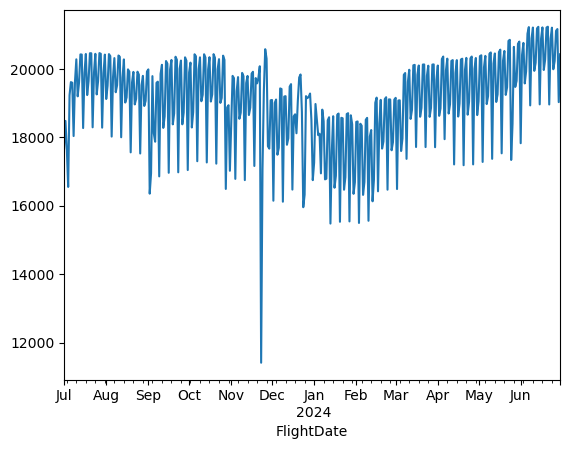

In [12]:
df.groupby(by="FlightDate")["FlightDate"].count().plot()

### **Flights By Origin**

<Axes: xlabel='OriginAirportName'>

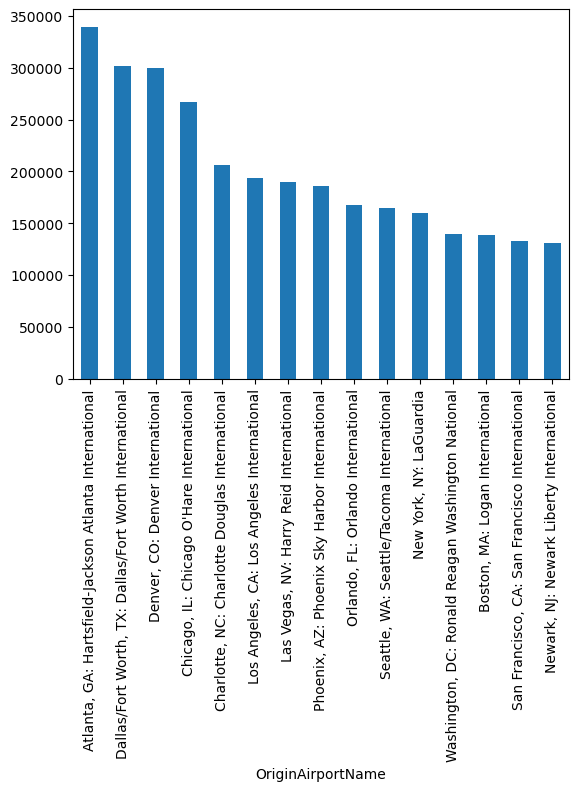

In [13]:
df_origin = df.groupby(by="OriginAirportName")["FlightDate"].count()
df_origin.sort_values(ascending=False).head(15).plot(kind="bar")

### **Flights By Airline**

<Axes: xlabel='Airline_Name'>

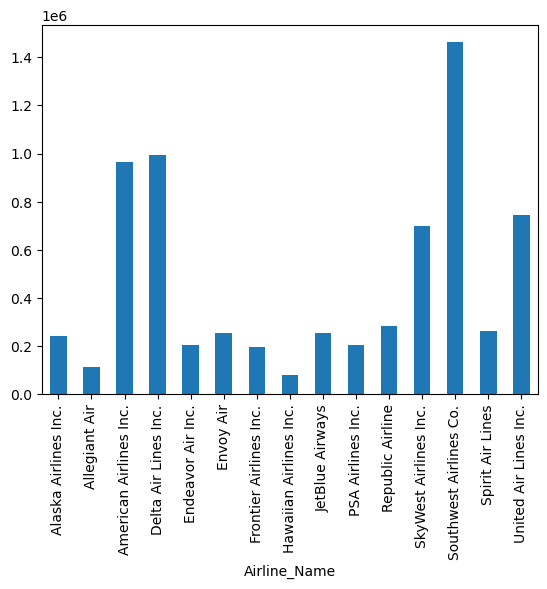

In [14]:
df.groupby(by="Airline_Name")["FlightDate"].count().plot(kind="bar")